 # Categorical Assessment

Every year, real estate properties are assessed for their value. There are key attributes that are considered when evaluating a property, and these include the condition, total number of rooms, number of bedrooms, bathrooms, etc. Use a parallel categories plot to plot these attributes as dimensions. Use the interactive features of parallel category plots to review how each dimension can affect the other.

In [6]:
import pandas as pd
import plotly.express as px
from pathlib import Path

 ### Prep Data

In [7]:
# Read in data
prop_assessments = pd.read_csv(
    Path("./Resources/allegheny_property_assessments.csv"), 
    index_col="LEGAL2", 
    low_memory=False
).sample(50, replace=True)
prop_assessments.head()

,LEGAL1,LEGAL3,NEIGHCODE,TAXCODE,TAXDESC,OWNERDESC,CLASS,CLASSDESC,USECODE,USEDESC,...,CONDITION,CONDITIONDESC,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,HEATINGCOOLING,HEATINGCOOLINGDESC,FIREPLACES,BSMTGARAGE
LEGAL2,,,,,,,,,,,,,,,,,,,,,
AVG152.23 IN ALL BEECHWOOD BLVD,J H AIKEN REV PLAN PTS 23-33- 34 ALL 24 LOT 70X,2 1/2 STY STN-CEM HSE 1739,11401,T,20 - Taxable,REGULAR,R,RESIDENTIAL,10,SINGLE FAMILY,...,3.0,AVERAGE,12.0,6.0,2.0,2.0,2,Central Heat,3.0,0.0
D AVE,SCHWITTER WEST VIEW PLAN 506 LOT 30X120 HIGHLAN,2 1/2 STY ALUM HSE 145,86402,T,20 - Taxable,REGULAR,R,RESIDENTIAL,10,SINGLE FAMILY,...,3.0,AVERAGE,6.0,3.0,1.0,0.0,B,Central Heat with AC,0.0,0.0
1 1/2 STY FRA ALUM HSE,JOHN BROWN PLAN 57 LOT 20.63X140 SALISBURY ST,NaN,11602,T,20 - Taxable,CORPORATION,R,RESIDENTIAL,10,SINGLE FAMILY,...,3.0,AVERAGE,5.0,2.0,1.0,0.0,B,Central Heat with AC,0.0,0.0
SANTA FE DR,WHITLINGER PLAN 95 LOT 60.04XAVG169.73X94.04 RR,1 STY BRK V HSE-GAR 216,87604,T,20 - Taxable,CORPORATION,R,RESIDENTIAL,10,SINGLE FAMILY,...,3.0,AVERAGE,5.0,3.0,1.0,1.0,B,Central Heat with AC,1.0,0.0
VIDEO DR,PLEASANT PLACE 28 IRREG LOT 38.12X138.96X99.67,1 1(2 STY BRK V HSE 155,84001,T,20 - Taxable,REGULAR,R,RESIDENTIAL,10,SINGLE FAMILY,...,2.0,GOOD,6.0,3.0,1.0,0.0,B,Central Heat with AC,0.0,1.0


 ### Slice Data

In [8]:
# Select list of columns
data = prop_assessments[
    ["LOCALTOTAL", "USEDESC", "CONDITIONDESC", "TOTALROOMS", "BEDROOMS", "FULLBATHS"]
]
data.head()

,LOCALTOTAL,USEDESC,CONDITIONDESC,TOTALROOMS,BEDROOMS,FULLBATHS
LEGAL2,,,,,,
AVG152.23 IN ALL BEECHWOOD BLVD,442800,SINGLE FAMILY,AVERAGE,12.0,6.0,2.0
D AVE,151400,SINGLE FAMILY,AVERAGE,6.0,3.0,1.0
1 1/2 STY FRA ALUM HSE,56000,SINGLE FAMILY,AVERAGE,5.0,2.0,1.0
SANTA FE DR,132600,SINGLE FAMILY,AVERAGE,5.0,3.0,1.0
VIDEO DR,73400,SINGLE FAMILY,GOOD,6.0,3.0,1.0


 ### Plot Data

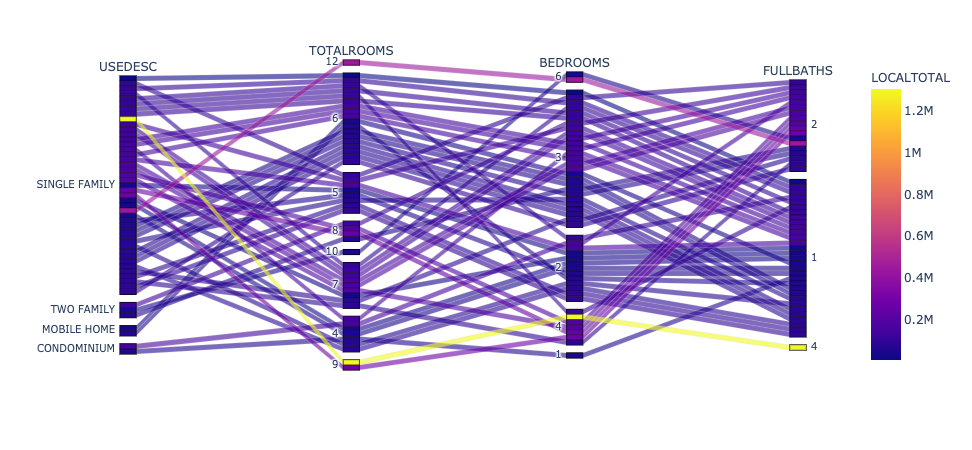

In [9]:
# Plot data
px.parallel_categories(
    data,
    dimensions=["USEDESC", "TOTALROOMS", "BEDROOMS", "FULLBATHS"],
    color="LOCALTOTAL",
)